In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Numeriek model

In [25]:
# Numeriek model spaarbekkens

ii=0

H = 1

z = H
H1 = 2/3
H2 = 1/3

alpha1 = 0.1
alpha2 = 0.1

z_series = []
H1_series = []
H2_series = []


def update_series():
    z_series.append(z)
    H1_series.append(H1)
    H2_series.append(H2)

update_series()
    
while ii < 5:
    
    # Neergaand
    dz = (z - H1) * (alpha1 / (alpha1+1))
    dH1 = dz / alpha1
    
    z -= dz
    H1 += dH1
    update_series()
    
    dz = (z - H2) * (alpha2 / (alpha2+1))
    dH2 = dz / alpha2
    
    z -= dz
    H2 += dH2
    update_series()
    
    # lozen tot beneden
    z = 0
    update_series()
    
    # Opgaand
    dz = (H2 - z) * (alpha2 / (alpha2+1))
    dH2 = dz / alpha2
    
    z += dz
    H2 -= dH2
    update_series()
    
    dz = (H1 - z) * (alpha1 / (alpha1+1))
    dH1 = dz / alpha1
    
    z += dz
    H1 -= dH1
    update_series()
    
    #Aanvullen tot top
    z = H
    update_series()
    
    ii +=1
    

(24.0, 31.5)

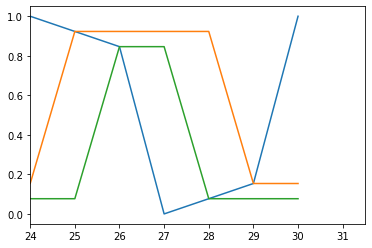

In [27]:
plt.plot(z_series)
plt.plot(H1_series)
plt.plot(H2_series)
plt.xlim(24)

# Spaarbekkens bij Born

In [116]:
import matplotlib.pyplot as plt
from pathlib import Path

In [117]:
outputdir = Path('Spaarbekken')

In [156]:
def compute_and_plot():
    q = alpha*n / (alpha*n + alpha + 1)
    dz = alpha / (alpha*n + alpha + 1) * H
    dH = dz / alpha

    H_sb = dz*(n-np.arange(1, n+1,1)+1+1/(2*alpha))

    T = lambda H: (2 * O_midden / (A_s * np.sqrt(2*9.81) * (1/alpha + 1))) * H**0.5
    T0 = lambda H: (2 * O_midden / (A_k * np.sqrt(2*9.81))) * H**0.5
    T_tot = n*T(1+1/alpha) + T0(1+1/alpha)
    print(T_tot)

    plt.subplots(figsize=(4,3))
    plt.plot([0, 0, 10, 10], [11.35, 0, 0, 11.35])
    for h in H_sb:
        plt.plot(13 + np.array([0, 0, 10*alpha, 10*alpha, 0]), [h + dH*0.5, h - dH*0.5, h - dH*0.5, h + dH*0.5, h + dH*0.5])

    plt.annotate(
        '', xy=(13, 0), xycoords='data',
        xytext=(13 + 10*alpha, 0), textcoords='data',
        arrowprops={'arrowstyle': '<->'})

    plt.annotate(
        f'alpha: {alpha:.1f}', xy=(13+5*alpha, 0.1), xycoords='data',
        xytext=(5, 0.1), textcoords='offset points', ha='center', va='bottom')

    plt.annotate(f'q: {q:.0%}\nT: {T_tot/60:.1f} min', xy=(13 + 10*alpha - 0.5, H), bbox=dict(boxstyle='square', fc='white'), va='top', ha='right')
    plt.grid(c='#DDD')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

    plt.savefig(outputdir / f'spaarbekken_{lock}_n{n}_alpha{alpha:.1f}.png', bbox_inches='tight', dpi=150)

303.8833491602979


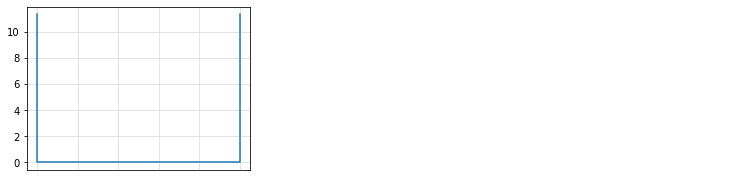

In [159]:
O_midden = 3872 # m2
O_bekken = 62 * 130 # m2
lock = 'Maasbracht'

alpha = O_bekken / O_midden
n = 0
H = 11.35

A_s = 3
A_k = 7

compute_and_plot()
